## Assingmnent 2:
### Linear Model and Logistic model for LA metro bike share trip data

### Content:
1. Abstract
2. Data and Acknowledgement
3. Exploratory Data Analysis <br>
  3.1 Data Cleaning <br>
  3.2 Data Prepration <br>
  3.3 Data Visualization <br>
4. Part A - Linear model
5. Part B - Logistic model
6. Part C - Multi-colinearity and step-wise regression
7. Part D - Interaction effects
8. Part E - Regularization
9. Conclusion
10. Contributions statement
11. Citations
12. License

### Abstract:
The purpose of this notebook is to create predictive linear model using both linear and logistic regression. The dataset used is taken from the Kaggle dataset LA metro Bike Share trip data. The dataset contains various factors recoreded per trip like Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude-Longitude,Ending Station ID,Ending Station Latitude-Longitude,Bike ID,Plan Duration,Trip Category,Passholder Type .The task is to predict the cost based on several parameters, generate different models by taking multiple and different columns into consideration and analyze the models. We have used Linear regression and Logistic regression and taken the diffrent factors like checking the multicolinearity, performing the K-fold cross validation, taking the interaction effects and predicting based on that model. We also used Rigid regularization to solve the ill-posed or overfitting the model.This models tell us the prediction of cost based on this factors. We got that mostly cost depends upon the Plan Duration,Trip Category,Passholder Type, Duration of the trip.


### Data:
This is a dataset hosted by the city of Los Angeles. The organization has an open data platform found here and they update their information according the amount of data that is brought in. Explores Los Angeles's Data using Kaggle "https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data" and all of the data sources available through the city of Los Angeles organization page. <br>
##### Columns
1. Trip ID
2. Duration
3. Start Time
4. End Time
5. Starting Station ID
6. Starting Station Latitude
7. Starting Station Longitude
8. Ending Station ID
9. Ending Station Latitude
10. Ending Station Longitude
11. Bike ID
12. Plan Duration
13. Trip Route Category
14. Passholder Type
15. Starting Lat-Long
17. Ending Lat-Long

### Acknowledgements
This dataset is maintained using Socrata's API and Kaggle's API. Socrata has assisted countless organizations with hosting their open data and has been an integral part of the process of bringing more data to the public.

##### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset

In [2]:
data= pd.read_csv("C:\\Users\\JAYESH\\Desktop\\DataScience\\Assingment2\\metro bike share trip data.csv", decimal = ',')

##### Display the first few and last few rows

In [3]:
data.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.0566101,-118.23721,3014.0,34.0566101,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.0566101,-118.23721,3014.0,34.0566101,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.0528984,-118.24156,3016.0,34.0528984,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.0528984,-118.24156,3016.0,34.0528984,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.0498886,-118.25588,3032.0,34.0498886,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


In [4]:
data.tail()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
132422,23660993,540,2017-03-31T23:43:00,2017-03-31T23:52:00,3055.0,34.044159,-118.251579,3035.0,34.048401,-118.260948,5978.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.260948', 'latitude': '34.0..."
132423,23660992,480,2017-03-31T23:44:00,2017-03-31T23:52:00,3055.0,34.044159,-118.251579,3035.0,34.048401,-118.260948,6478.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.260948', 'latitude': '34.0..."
132424,23660991,480,2017-03-31T23:44:00,2017-03-31T23:52:00,3082.0,34.04652,-118.237411,3054.0,34.039219,-118.236488,6183.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.236488', 'latitude': '34.0..."
132425,23660990,420,2017-03-31T23:45:00,2017-03-31T23:52:00,3082.0,34.04652,-118.237411,3054.0,34.039219,-118.236488,5900.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.236488', 'latitude': '34.0..."
132426,23664826,1260,2017-03-31T23:45:00,2017-04-01T00:06:00,3078.0,34.064281,-118.238937,3029.0,34.048851,-118.246422,6207.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.246422', 'latitude': '34.0..."


##### Getting the dataset info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 16 columns):
Trip ID                       132427 non-null int64
Duration                      132427 non-null int64
Start Time                    132427 non-null object
End Time                      132427 non-null object
Starting Station ID           132408 non-null float64
Starting Station Latitude     132379 non-null object
Starting Station Longitude    132379 non-null object
Ending Station ID             132331 non-null float64
Ending Station Latitude       131376 non-null object
Ending Station Longitude      131376 non-null object
Bike ID                       132417 non-null float64
Plan Duration                 131661 non-null float64
Trip Route Category           132427 non-null object
Passholder Type               132427 non-null object
Starting Lat-Long             98622 non-null object
Ending Lat-Long               131376 non-null object
dtypes: float64(4), int64(2), object(10)

###### By just looking at first & last few rows "Trip id" provide no additional info and is just like index and Plan duration provide no extra info since passholder type already convey the plan duration and also the columns "Starting Lat-Long" "Ending Lat-Long" are redundant and also Start_Time and End_Time as they are not much of use for us now and will create a problem during regression as they are Timestamps.

### Data Cleaning
It's a process of correcting the inaccurate data. We need to check and clean the data in order to remove any null values.
The following isnull function will figure out if there are any missing values in the dataframe, and will then sum up the total for each column and also we need to drop the redundant columns.

In [6]:
#Droping the columns
data=data.drop(['Starting Lat-Long','Ending Lat-Long','Start Time','End Time'],axis=1)

In [7]:
#Getting the sum of null values
data.isnull().sum()

Trip ID                          0
Duration                         0
Starting Station ID             19
Starting Station Latitude       48
Starting Station Longitude      48
Ending Station ID               96
Ending Station Latitude       1051
Ending Station Longitude      1051
Bike ID                         10
Plan Duration                  766
Trip Route Category              0
Passholder Type                  0
dtype: int64

In [8]:
#Removing the null values
data=data.dropna()

In [9]:
data.isnull().sum().sum()

0

###### So, we can see that by using the pandas function dropna we have drop the null values from the rows and now our dataset contains 0 null values.

Now, lets get the some insight of our data set by describe() function which will show the min,max,mean,standerd deviation,etc. of our dataset

In [10]:
data.describe()

,Trip ID,Duration,Starting Station ID,Ending Station ID,Bike ID,Plan Duration
count,1.307150e+05,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,1.145928e+07,1355.489577,3042.560341,3041.990912,6193.697900,44.886318
std,6.362769e+06,4674.172366,30.968528,33.546330,293.284747,90.433685
min,1.912818e+06,60.000000,3005.000000,3005.000000,4727.000000,0.000000
25%,5.060320e+06,360.000000,3024.000000,3023.000000,5953.000000,0.000000
50%,1.022443e+07,600.000000,3039.000000,3038.000000,6186.000000,30.000000
75%,1.709856e+07,1080.000000,3063.000000,3063.000000,6434.000000,30.000000
max,2.373246e+07,86400.000000,4108.000000,4108.000000,6728.000000,365.000000


##### Creating the dummy variables:
We need to create the dummy variables to turn the categories into high(1) and low(0) value  for something the regression can understand. In statistics, particularly in regression analysis, a dummy variable (also known as an indicator variable, design variable, one-hot encoding, Boolean indicator, binary variable, or qualitative variable) is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. In python we can create the dummy varibles using pandas
So for out dataset we need to create the dummy varaible for columns like:
1. Trip Route Category
2. Passholder Type

In [11]:
#creating the dummy varibales for Trip Round Category:
data= pd.get_dummies(data,columns= ['Trip Route Category'],drop_first=True)

In [12]:
#Dummies for Passholder Type:
data= pd.get_dummies(data,columns= ['Passholder Type'],drop_first=True)

In [13]:
data.describe()

,Trip ID,Duration,Starting Station ID,Ending Station ID,Bike ID,Plan Duration,Trip Route Category_Round Trip,Passholder Type_Monthly Pass,Passholder Type_Walk-up
count,1.307150e+05,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,1.145928e+07,1355.489577,3042.560341,3041.990912,6193.697900,44.886318,0.096638,0.615974,0.311678
std,6.362769e+06,4674.172366,30.968528,33.546330,293.284747,90.433685,0.295465,0.486366,0.463181
min,1.912818e+06,60.000000,3005.000000,3005.000000,4727.000000,0.000000,0.000000,0.000000,0.000000
25%,5.060320e+06,360.000000,3024.000000,3023.000000,5953.000000,0.000000,0.000000,0.000000,0.000000
50%,1.022443e+07,600.000000,3039.000000,3038.000000,6186.000000,30.000000,0.000000,1.000000,0.000000
75%,1.709856e+07,1080.000000,3063.000000,3063.000000,6434.000000,30.000000,0.000000,1.000000,1.000000
max,2.373246e+07,86400.000000,4108.000000,4108.000000,6728.000000,365.000000,1.000000,1.000000,1.000000


#####  Data Prepration:
We'll predict the cost how it varies with the different independent variables. So, we ll calculate the cost based on duration of trip as Cost = Duration*0.5 

In [14]:
data["Cost"]=data["Duration"]*0.5

In [15]:
data.head()

,Trip ID,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category_Round Trip,Passholder Type_Monthly Pass,Passholder Type_Walk-up,Cost
0,1912818,180,3014.0,34.0566101,-118.23721,3014.0,34.0566101,-118.23721,6281.0,30.0,1,1,0,90.0
1,1919661,1980,3014.0,34.0566101,-118.23721,3014.0,34.0566101,-118.23721,6281.0,30.0,1,1,0,990.0
2,1933383,300,3016.0,34.0528984,-118.24156,3016.0,34.0528984,-118.24156,5861.0,365.0,1,0,0,150.0
3,1944197,10860,3016.0,34.0528984,-118.24156,3016.0,34.0528984,-118.24156,5861.0,365.0,1,0,0,5430.0
4,1940317,420,3032.0,34.0498886,-118.25588,3032.0,34.0498886,-118.25588,6674.0,0.0,1,0,1,210.0


### Data Visualization:
Data visualization is viewed by many disciplines as a modern equivalent of visual communication. It involves the creation and study of the visual representation of data. To communicate information clearly and efficiently, data visualization uses statistical graphics, plots, information graphics and other tools.

###### Correlation
Correlation cofficent (r) if 'r' is towards 0 then there no absoulte relation between the two factors, If 'r' is towards the positive 1 there they are directly propostional to each other as one factor increases the other is tend to be increasing and when 'r' is toward negative 1 then they are inversly propotional to each other as one factor increases the other tends to be decreasing

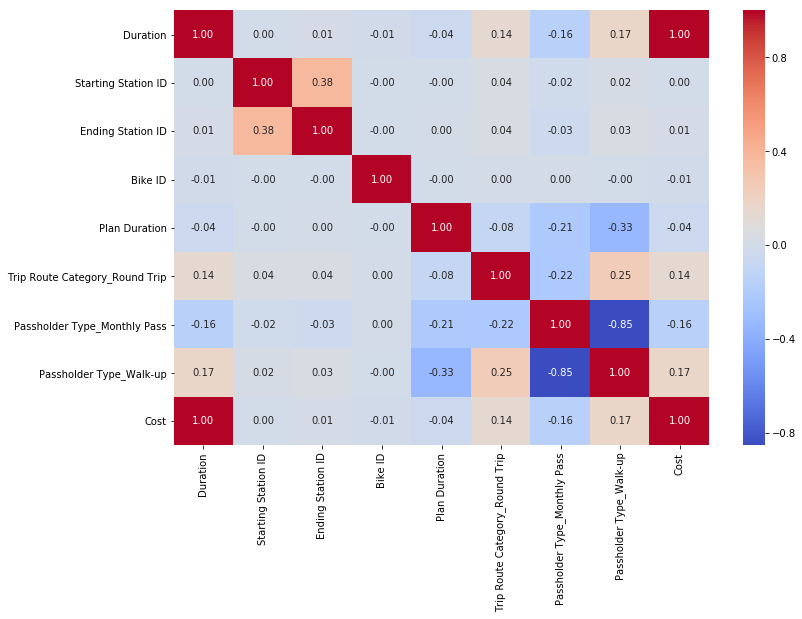

In [16]:
#Ploting heat maps to check for factors that affect quality
plt.figure(figsize=(12,8))
#fmt='.2f'->2 decimals, annot -> numerical representation, iloc-> primary integer position
sns.heatmap(data=data.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

**Correlation among variables**
with cost most correlated factors are  Trip Route Category_Round Trip, Passholder Type_Monthly Pass, Passholder Type_Walk-up.

**Pairplot**
We'll plot the pairplot againts cost for the features

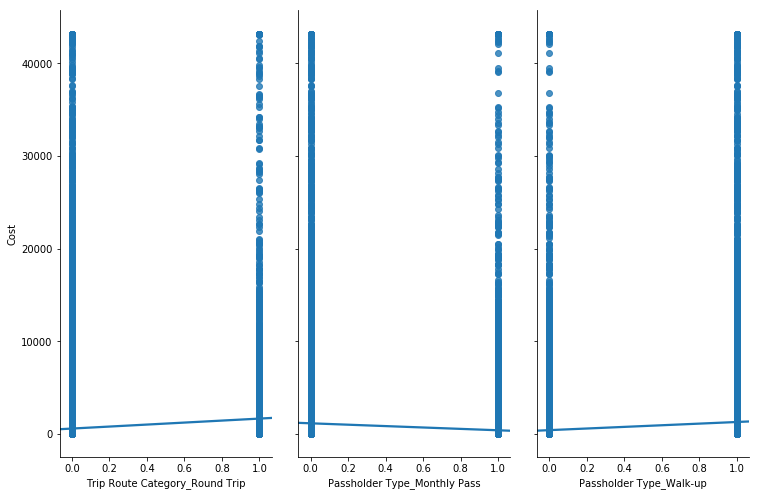

In [17]:
features = [ 'Trip Route Category_Round Trip', 'Passholder Type_Monthly Pass', 'Passholder Type_Walk-up']
x = data[features]
y = data['Cost']
#plotting features vs age
sns.pairplot(data,x_vars=features,y_vars='Cost',kind='reg',height=7,aspect=0.5)

**From the above pairplots for "Trip Route Category_Round Trip", "Passholder Type_Monthly Pass", "Passholder Type_Walk-up" vs Cost we can see that there are more people who opt for Walkup Pass than Monthly Pass and more people prefer Round Trip than One Way Trip.** 

### Linear models

##### Linear regression:
In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.
$$y = \beta_0 + \beta_1 x + \varepsilon .$$



Multivariate Linear Regression Model takes all of the independent variables into consideration. In reality, not all of the variables observed are highly statistically important. That means, some of the variables make greater impact to the dependent variable Y, while some of the variables are not statistically important at all. 

**Model 1**- <br>
For this we'll take all coloumns in X(independent variables) other than Cost and Duration and Cost as Y our target variables and check prediction using linear.

* Splitting the data into train and test data

In [18]:
X = data.drop(columns=['Cost','Duration'])
Y = data[['Cost']]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 12)
(26143, 12)
(104572, 1)
(26143, 1)


**We'll fit our training data into regression model and calculate mean squared error <br>
To Calculate we need to :** 
1. Find the regression line.
2. Insert your X values into the linear regression equation to find the new Y values (Y').
3. Subtract the new Y value from the original to get the error.
4. Square the errors.
5. Add up the errors.
6. Find the mean.

In [20]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

5510796.4399648085


We ll get the summary of our model as it calculate all the diffrent measures or values of a model

In [21]:
model = sm.OLS(Y_test.astype(float),X_test.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     94.01
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          1.58e-210
Time:                        22:48:01   Log-Likelihood:            -2.3999e+05
No. Observations:               26143   AIC:                         4.800e+05
Df Residuals:                   26131   BIC:                         4.801e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Trip ID                        -5.148e-06    2.3e-06     -2.240      0.025   -9.65e-06   -6.44e-07
Starting Station ID               -0.6162      0.559     -1.103      0.270      -1.712       0.479
Starting Station Latitude      -3385.8494   2010.092     -1.684      0.092   -7325.739     554.041
Starting Station Longitude      -967.6679    578.590     -1.672      0.094   -2101.735     166.400
Ending Station ID                 -0.7451      0.567     -1.314      0.189      -1.857       0.366
Ending Station Latitude          356.2943   2010.924      0.177      0.859   -3585.227    4297.816
Ending Station Longitude         111.4184    578.853      0.192      0.847   -1023.166    1246.002
Bike ID                           -0.0046      0.050     -0.092      0.927      -0.102       0.093
Plan Duration                     18.3774      7.427      2.475      0.013       3.821      32.934
Trip Route Category_Round Trip   706.8488     50.814     13.910      0.000     607.250     806.448
Passholder Type_Monthly Pass    5915.5372   2486.527      2.379      0.017    1041.808    1.08e+04
Passholder Type_Walk-up         7261.6677   2710.744      2.679      0.007    1948.462    1.26e+04
==============================================================================
Omnibus:                    47778.669   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53499324.626
Skew:                          13.812   Prob(JB):                         0.00
Kurtosis:                     222.888   Cond. No.                     3.31e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Checking R score for regression
reg.score(X_test,Y_test)

0.037459774585567374

##### Cross validation of model using k-fold cross validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

The general procedure is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
4. Take the group as a hold out or test data set
5. Take the remaining groups as a training data set
6. Fit a model on the training set and evaluate it on the test set
7. Retain the evaluation score and discard the model
8. Summarize the skill of the model using the sample of model evaluation scores

In [23]:
#k-fold 
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

3.7068374983666925

From **Model 1** summary we can see that  R^2 and Adj.R^2 (R^2 values is statistical measure how close the data are to be fitted with regression line, A high R^2 value is a good model) value is 1.
And, AIC and BIC are both penalized-likelihood criteria. Both are of the form “measure of fit + complexity penalty” & also we got k-flod cross validation for our model.

* Is the relationship significant? - Yes  
* Are any model assumptions violated? - No     
* Does the model make sense? Interpret the meaning of each independent variable. <br>
  - Yes 
* Cross-validate the model. How well did it do? - 3.96
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
  - R-squared:	0.041 <br>
    AIC- 4.783e+05 <br>
    BIC- 4.784e+05 <br>

**Model 2**-

For model 2: Now, lets check with diffrent parameters accordingly that if our accuracy score increses or not

In [24]:
X=data[['Plan Duration', 'Trip Route Category_Round Trip', 'Passholder Type_Monthly Pass', 'Passholder Type_Walk-up']]
X.head()

,Plan Duration,Trip Route Category_Round Trip,Passholder Type_Monthly Pass,Passholder Type_Walk-up
0,30.0,1,1,0
1,30.0,1,1,0
2,365.0,1,0,0
3,365.0,1,0,0
4,0.0,1,0,1


In [25]:
#train-test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 4)
(26143, 4)
(104572, 1)
(26143, 1)


In [26]:
# Linear regression
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

4903334.174348774


As we see that Mean_squared_error is zero so this model is perfect fit 

Let's get summarized result of our model

In [27]:
model = sm.OLS(Y_test.astype(float),X_test.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     340.2
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          9.89e-217
Time:                        22:48:01   Log-Likelihood:            -2.3846e+05
No. Observations:               26143   AIC:                         4.769e+05
Df Residuals:                   26139   BIC:                         4.770e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Plan Duration                      1.4811      0.139     10.620      0.000       1.208       1.755
Trip Route Category_Round Trip   715.3994     48.316     14.807      0.000     620.698     810.101
Passholder Type_Monthly Pass     320.4865     18.014     17.791      0.000     285.178     355.795
Passholder Type_Walk-up         1102.4072     26.538     41.540      0.000    1050.390    1154.424
==============================================================================
Omnibus:                    48146.909   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59869233.146
Skew:                          13.996   Prob(JB):                         0.00
Kurtosis:                     235.762   Cond. No.                         367.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#checking R score for regression
reg.score(X_test,Y_test)

0.03732739911152405

In [29]:
#calclating accuracy of model
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

3.75264628048491

For Model 2 :
* Is the relationship significant? - Yes  
* Are any model assumptions violated? - No     
* Does the model make sense? Interpret the meaning of each independent variable. <br>
  - Yes 
* Cross-validate the model. How well did it do? - 3.90
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
  - R-squared:	0.041 <br>
    AIC- 4.804e+05 <br>
    BIC- 4.804e+05 <br>

**Model 3**-

In this model we will taken some features based on the correlation we have obtained we'll take the variables like  Walkup pass,Monthlypass,FlexPass,One way trip or Round trip.

In [30]:
X=data[['Trip Route Category_Round Trip', 'Passholder Type_Monthly Pass', 'Passholder Type_Walk-up']]

Y = data[['Cost']]

In [31]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 3)
(26143, 3)
(104572, 1)
(26143, 1)


In [32]:
#Linear regression
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

4916224.147802471


In [33]:
#summary
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     5451.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:48:02   Log-Likelihood:            -1.1970e+06
No. Observations:              130715   AIC:                         2.394e+06
Df Residuals:                  130712   BIC:                         2.394e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Trip Route Category_Round Trip   800.0512     22.167     36.092      0.000     756.604     843.498
Passholder Type_Monthly Pass     351.7057      8.149     43.160      0.000     335.734     367.677
Passholder Type_Walk-up         1117.0432     12.260     91.115      0.000    1093.014    1141.072
==============================================================================
Omnibus:                   236753.052   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        258670802.271
Skew:                          13.586   Prob(JB):                         0.00
Kurtosis:                     219.229   Cond. No.                         2.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#checking R score for regression
reg.score(X_test,Y_test)

0.04037884441464157

In [35]:
#calculating accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

3.9993950675147905

For Model 3:
* Is the relationship significant? - Yes  
* Are any model assumptions violated? - No     
* Does the model make sense? Interpret the meaning of each independent variable. <br>
  - Yes 
* Cross-validate the model. How well did it do? - 3.80
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
  - R-squared:	0.111 <br>
    AIC- 2.394e+06 <br>
    BIC- 2.394e+06 <br>
    
    Hence, Model 3 gives us the best results

### Logistic Model:


Logistic regression , or logit regression, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.). Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities. 

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\ln \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$


**Model 1** <br>
In this model we'll predict whether PASSHOLDER TYPE is "Walk-up" OR "Not"

In [36]:
X = data.drop(columns=['Passholder Type_Walk-up','Passholder Type_Monthly Pass','Plan Duration'])
Y = data['Passholder Type_Walk-up']

**We'll split it into the train_test data**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 11)
(26143, 11)
(104572,)
(26143,)


Taking the LogisticRegression from sklearn and fitting our training data into it and checking its accuracy.

In [38]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)
print(lr_acc_score*100)

71.71709444210688


**K-fold Cross validation:**
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
   a. Take the group as a hold out or test data set <br>
   b. Take the remaining groups as a training data set<br>
   c. Fit a model on the training set and evaluate it on the test set<br>
   d. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [39]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.713


In [40]:
# to caculate the probability of dependent variable
probability=lr.predict_proba(X_test) 
print(probability)

[[0.71488378 0.28511622]
 [0.67254409 0.32745591]
 [0.61210004 0.38789996]
 ...
 [0.71362799 0.28637201]
 [0.71306438 0.28693562]
 [0.72636148 0.27363852]]


We have an accuracy of 71.40% which is good but not bad but let us check other attributes. and we got K-fold accuracy average.
* Is the relationship significant?   
  - yes
* Are any model assumptions violated?    
  - yes 
* Cross-validate the model. How well did it do? 
  - 71.3% 
* Calculate the probability of getting the dependent variable
  - We got the probability array above.

**Model 2**<br>
To Predict Whether the Trip Type is "Round Trip" OR "Not"

In [41]:
X = data.drop(columns=['Trip Route Category_Round Trip'])
Y = data['Trip Route Category_Round Trip']

In [42]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 13)
(26143, 13)
(104572,)
(26143,)


In [43]:
#Logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, predict)
print(lr_acc_score*100)

90.23065447729793


In [44]:
#K fold cross validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.902


In [45]:
# to caculate the probability of dependent variable
probability=lr.predict_proba(X_test) 
print(probability)

[[0.88603843 0.11396157]
 [0.89763694 0.10236306]
 [0.89508058 0.10491942]
 ...
 [0.89585281 0.10414719]
 [0.89694133 0.10305867]
 [0.89697623 0.10302377]]


This model is have greater accuracy than the other model of 90.51% and also we got K-fold avg. accuracy.
* Is the relationship significant?   
  - yes
* Are any model assumptions violated?    
  - yes 
* Cross-validate the model. How well did it do? 
  - 90.51% 
* Calculate the probability of getting the dependent variable
  - We got the probability array above.

**Model 3**

In this model we'll predict whether PASSHOLDER TYPE is "Monthly Pass" OR "Not"

In [46]:
X = data.drop(columns=['Passholder Type_Monthly Pass','Passholder Type_Walk-up','Plan Duration'])
Y = data['Passholder Type_Monthly Pass']

In [47]:
#Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 11)
(26143, 11)
(104572,)
(26143,)


In [48]:
#Logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, predict)
print(lr_acc_score*100)

66.1974524729373


In [49]:
# K-fold Cross validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.666


In [50]:
# to caculate the probability of dependent variable
probability=lr.predict_proba(X_test) 
print(probability)

[[0.38138945 0.61861055]
 [0.346813   0.653187  ]
 [0.35120526 0.64879474]
 ...
 [0.31337021 0.68662979]
 [0.34337473 0.65662527]
 [0.43455908 0.56544092]]


This model has the accuracy of 66.03% and also got k-fold accuracy score
* Is the relationship significant?   
  - yes
* Are any model assumptions violated?    
  - yes 
* Cross-validate the model. How well did it do? 
  - 66.03%
* Calculate the probability of getting the dependent variable
  - We got the probability array above.

**For Logistic Regression the Model 2 is giving us high accuracy score.**

### Multi-colinearity and step-wise regression

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. While,Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

Steps for Implementing VIF:
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you   should consider dropping the variable.

In [51]:
#Encoding the coloumns to be in numeric
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [52]:
#Multi-collinearity :
from statsmodels.stats import outliers_influence
vif = pd.DataFrame()
vif['VIF Factor'] = [outliers_influence.variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['features'] = data.columns
vif.round(1)

,VIF Factor,features
0,1.000000,Trip ID
1,inf,Duration
2,1.000000,Starting Station ID
3,1.200000,Starting Station Latitude
4,1.300000,Starting Station Longitude
5,1.100000,Ending Station ID
6,1.200000,Ending Station Latitude
7,1.300000,Ending Station Longitude
8,1.000000,Bike ID
9,11.000000,Plan Duration


It can be infered from the result that VIF for duration, Cost, Plan Duration,Passholder walkup type, Monthly type are more so we are dropping that coloumn are more. Hence we are dropping those columns from the dataset

In [53]:
data_dr = data.drop(['Duration', 'Cost', 'Plan Duration','Passholder Type_Monthly Pass','Passholder Type_Walk-up'], axis = 1)
print(data_dr.head(5))

   Trip ID  Starting Station ID  Starting Station Latitude  \
0        0                    7                        111   
1        1                    7                        111   
2        2                    8                        103   
3       35                    8                        103   
4        3                   23                         86   

   Starting Station Longitude  Ending Station ID  Ending Station Latitude  \
0                          15                  7                      111   
1                          15                  7                      111   
2                          28                  8                      103   
3                          28                  8                      103   
4                          73                 23                       86   

   Ending Station Longitude  Bike ID  Trip Route Category_Round Trip  
0                        15      452                               1  
1                     

In [54]:
#Calculating VIF
vif = pd.DataFrame()
vif['VIF Factor'] = [outliers_influence.variance_inflation_factor(data_dr.values, i) for i in range(data_dr.shape[1])]
vif['features'] = data_dr.columns
vif.round(1)

,VIF Factor,features
0,3.8,Trip ID
1,3.5,Starting Station ID
2,7.4,Starting Station Latitude
3,4.9,Starting Station Longitude
4,3.3,Ending Station ID
5,7.2,Ending Station Latitude
6,4.7,Ending Station Longitude
7,3.7,Bike ID
8,1.1,Trip Route Category_Round Trip


1. Is there any multi-colinearity in the model?  
   - Yes
2. In the multiple regression models are predictor variables independent of all the other predictor variables? 
   - No 
3. In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
   - Rank 1- 'Trip Route Category_Round Trip', 'Passholder Type_Monthly Pass', 'Passholder Type_Walk-up'.<br>
     Rank 2- 'Plan Duration','Trip Route Category_Round Trip','Passholder Type_Monthly Pass', 'Passholder Type_Walk-up'<br>
     Rank 3-  Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending                 Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category_Round Trip,Passholder                   Type_Monthly Pass,Passholder Type_Walk-up


### Interaction effects

Interaction effects occur when the effect of one variable depends on the value of another variable. Interaction effects are common in regression analysis, ANOVA, and designed experiments. In this blog post, I explain interaction effects, how to interpret them in statistical designs, and the problems you will face if you don’t include them in your model.

### 1. Model 1 for Interaction effects

We'll take the Duration_walk up to predict cost and see if our models accuracy increses or not

In [55]:
data['Duration_Walk-up']=data['Plan Duration' ]* data['Passholder Type_Walk-up']
X = data[['Duration_Walk-up','Trip Route Category_Round Trip', 'Passholder Type_Monthly Pass', 'Passholder Type_Walk-up']]
Y = data[['Cost']]

Split it into train and test data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 4)
(26143, 4)
(104572, 1)
(26143, 1)


Perform Linear Regression and genrate the summary

In [57]:
#Linear regression
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

2317.6890945951113


In [58]:
#summary
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     9063.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:48:22   Log-Likelihood:            -7.0296e+05
No. Observations:              130715   AIC:                         1.406e+06
Df Residuals:                  130712   BIC:                         1.406e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Duration_Walk-up                        0          0        nan        nan           0           0
Trip Route Category_Round Trip    24.4580      0.506     48.309      0.000      23.466      25.450
Passholder Type_Monthly Pass      10.3914      0.186     55.833      0.000      10.027      10.756
Passholder Type_Walk-up           32.5174      0.280    116.131      0.000      31.969      33.066
==============================================================================
Omnibus:                   202122.217   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83123019.173
Skew:                          10.050   Prob(JB):                         0.00
Kurtosis:                     124.893   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
#calculating accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

6.567949948716794

We got the accuracy of 6.15 which is still greater than our previous models lets do another Interaction model

### 2. Model 2 for Interaction effects

For this we'll take RoundTrip_walk up and perform the regression.

In [60]:
data['RoundTrip_Walk-up']=data['Trip Route Category_Round Trip' ]* data['Passholder Type_Walk-up']
X = data[['RoundTrip_Walk-up','Trip Route Category_Round Trip', 'Passholder Type_Monthly Pass', 'Passholder Type_Walk-up']]
Y = data[['Cost']]

In [61]:
#train-test Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 4)
(26143, 4)
(104572, 1)
(26143, 1)


In [62]:
# linear regression
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

2437.957617717936


In [63]:
# summary
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     6857.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:48:22   Log-Likelihood:            -7.0286e+05
No. Observations:              130715   AIC:                         1.406e+06
Df Residuals:                  130711   BIC:                         1.406e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
RoundTrip_Walk-up                 14.6669      1.045     14.035      0.000      12.619      16.715
Trip Route Category_Round Trip    15.2901      0.826     18.506      0.000      13.671      16.909
Passholder Type_Monthly Pass      10.8131      0.188     57.398      0.000      10.444      11.182
Passholder Type_Walk-up           31.3774      0.291    107.697      0.000      30.806      31.948
==============================================================================
Omnibus:                   202297.085   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83564646.168
Skew:                          10.066   Prob(JB):                         0.00
Kurtosis:                     125.220   Cond. No.                         6.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#calculating accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()*100

6.84252139731277

For this model 2 we got more accuracy score than Model 1 and there is there is a significant synergy (interaction of two or more features) between the terms

### Regularization

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.The key difference between these two is the penalty term,the key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

**Here** we will do Ridge Regression or L2 Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)


In [65]:
#Taking X and Y
X=data[['Trip Route Category_Round Trip', 'Passholder Type_Monthly Pass', 'Passholder Type_Walk-up']]
Y = data[['Cost']]

We'll split our data into training and testing model and then do the Ridge reguralization, for that we ll take value of α=0.1.
For value of α when its 0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104572, 3)
(26143, 3)
(104572, 1)
(26143, 1)


In [67]:
# function to evaluate the accuracy of the model

def evaluate_reg(model, test_features, test_labels):
  predictions = model.predict(test_features)
  errors = abs(predictions - test_labels)
  mape = 100 * np.mean(errors / test_labels)
  accuracy = 100 - mape
  print('Model Performance:')
  print('Mean ABsolute Error: {:0.4f}'.format(float(np.mean(errors))))
  print('Accuracy = {:0.2f}%'.format(float(accuracy)))
  return accuracy

In [68]:
# Fitting linear regression to training set
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
#get the parameters for default model

lr_params = lr.get_params
lr_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [70]:
## Hyperparameter tuning for ridge regression
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
# Fitting regression to training set
# create and fit a ridge regression model, testing each alpha
ridge = linear_model.Ridge(alpha=0.1, normalize=True)
# Instantiate the grid search model
grid = RidgeCV(alphas=[1e-8,1e-7,1e-6,1e-5,1e-4, 1e-2, 1e-1, 10], normalize=True, cv = 5)
# Fit the grid search to the data
grid.fit(X_train, Y_train)
# get the best parameter
grid.alpha_
#pred feature
pred=grid.predict(X_test)
# summarize the results of the grid search
#tuned_ridge = grid.best_estimator_
tuned_ridge_accuracy = evaluate_reg(grid, X_test, Y_test)

Model Performance:
Mean ABsolute Error: 16.0350
Accuracy = -inf%


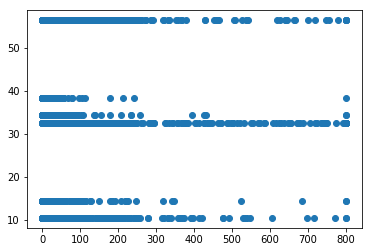

In [71]:
#plotting the scatter plot
plt.scatter(Y_test, pred)

**Lower the alpha value, magnitude of the coefficients is more, for a greater alpha value, flexibility of model will be strict**

### Conclusion
In the above-performed analysis we successfully designed linear models with great accuracy rate with respect logistic regression with mean squared error and accuracy in case of linear regression, we used the k fold to validate the data train and test, also performed stepwise regression to take away multi colinearity to avoid building faulty models. We used L2 Rigid regularization to perform and check if the model for linear regression is rightly build or not.
**Results we got-** 
1. Linear Regression:
   - Model 3 gives us the best results to predict cost. <br>
2. Logistic Regression:
   - Model 2 where we predict that the Type of Trip is round or not gives us the best accuracy  <br>
3. Multicolinarity and step regression   
   - We calculated VIF factors and then drop the variables whose VIF were high and then we caluclated ranked of our factors      that best predict. <br>
4. Interaction effects-   
   - By taking we RoundTrip_Walk-up and Duration_Walk-up we got more better accuracy than our pre done models <br>
5. For L2 or Rigid regularization   
   - We got that Lower the alpha value, magnitude of the coefficients is more, for a greater alpha value, flexibility of    model will be strict.
   

### Contributions statement
40% - By me <br>
60 %- By External resources

### Citations

1. https://www.geeksforgeeks.org/python-for-data-science/ --> Method descriptions<br>
2. https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-datadata --> dataset used <br>
3. https://www.kaggle.com/johansing/la-metro-bike-share-bc35ec --> for refernce <br>
4. https://mode.com/python-tutorial/pandas-dataframe/ -> Python Documentation <br>
5. https://seaborn.pydata.org/ ->Seaborn Plots(Documentation) <br>
6. https://www.wikipedia.org/ -> Definitions <br>
7. https://pandas.pydata.org/pandas-docs/stable/ --> Pandas Documentation <br>
8. https://etav.github.io/python/vif_factor_python.html --> <br>

### License 

( https://opensource.org/licenses/MIT) 
Copyright <2019> JAYESH V PATIL

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.